<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
#data
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
NUM_FEATURES=2
NUM_CLASSES=4
RANDOM_SEED=42

X_blob, y_blob=make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5,random_state=RANDOM_SEED)


In [27]:
#Splitting data
from sklearn.model_selection import train_test_split
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)


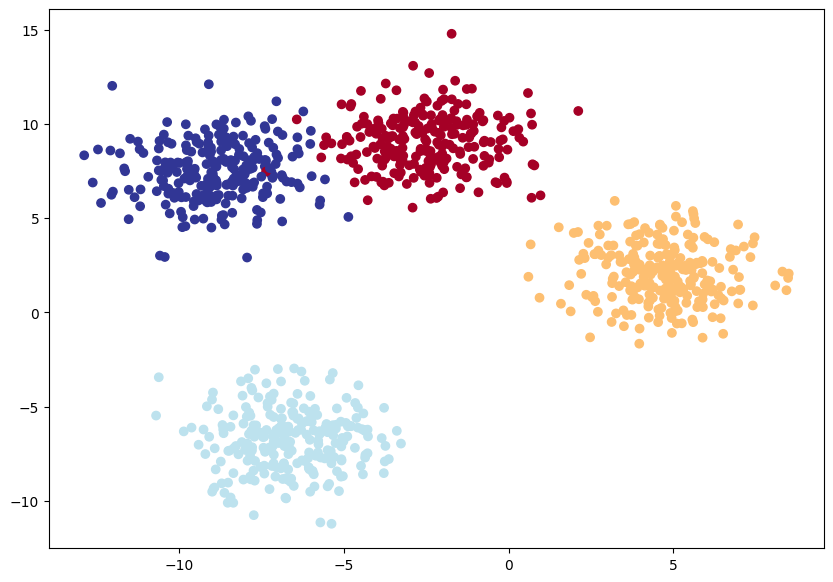

In [28]:
#visualizing
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [29]:
#MODEL
class MultiClassification(nn.Module):
  def __init__(self, input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_003=MultiClassification(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8)

In [30]:
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [31]:
#loss+optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_003.parameters(), lr=0.1)

In [32]:
#training+testing

torch.manual_seed=42
epochs=1000

for epoch in range(epochs):
  model_003.train()
  y_logits=model_003(X_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss=criterion(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_003.eval()
  with torch.inference_mode():
    test_logits=model_003(X_blob_test)
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss=criterion(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc}% | Test Loss: {test_loss} | Test Acc: {test_acc}%")

Epoch: 0 | Loss: 2.5572457313537598 | Acc: 1.375% | Test Loss: 0.8370184302330017 | Test Acc: 75.0%
Epoch: 100 | Loss: 0.03122427500784397 | Acc: 99.25% | Test Loss: 0.022386902943253517 | Test Acc: 99.5%
Epoch: 200 | Loss: 0.02623564563691616 | Acc: 99.25% | Test Loss: 0.016371212899684906 | Test Acc: 99.5%
Epoch: 300 | Loss: 0.024836724624037743 | Acc: 99.375% | Test Loss: 0.014444700442254543 | Test Acc: 99.5%
Epoch: 400 | Loss: 0.024169981479644775 | Acc: 99.375% | Test Loss: 0.013476350344717503 | Test Acc: 99.5%
Epoch: 500 | Loss: 0.02375021018087864 | Acc: 99.375% | Test Loss: 0.012873648665845394 | Test Acc: 99.5%
Epoch: 600 | Loss: 0.023439180105924606 | Acc: 99.375% | Test Loss: 0.012445308268070221 | Test Acc: 99.5%
Epoch: 700 | Loss: 0.02318541333079338 | Acc: 99.375% | Test Loss: 0.012111800722777843 | Test Acc: 99.5%
Epoch: 800 | Loss: 0.022965945303440094 | Acc: 99.375% | Test Loss: 0.011834824457764626 | Test Acc: 99.5%
Epoch: 900 | Loss: 0.022769035771489143 | Acc: 99.

In [33]:
#testing the model now
model_003.eval()
with torch.inference_mode():
  y_logits=model_003(X_blob_test)


In [37]:
#downloading helper_function
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists


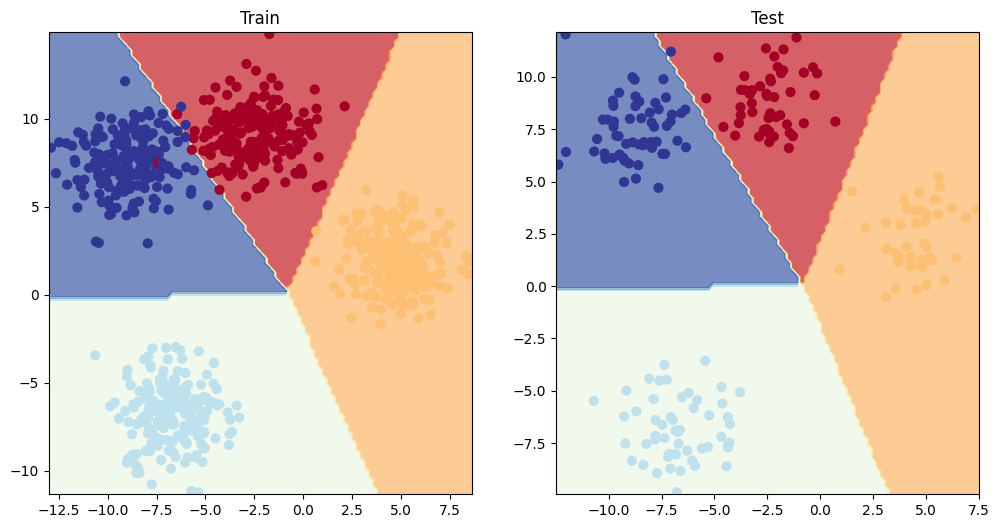

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_003, X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_003, X_blob_test,y_blob_test)